In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df = pd.read_csv('./kaggle/input/Life Expectancy at Birth.csv')
df

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Life Expectancy at Birth (1990),Life Expectancy at Birth (1991),Life Expectancy at Birth (1992),...,Life Expectancy at Birth (2012),Life Expectancy at Birth (2013),Life Expectancy at Birth (2014),Life Expectancy at Birth (2015),Life Expectancy at Birth (2016),Life Expectancy at Birth (2017),Life Expectancy at Birth (2018),Life Expectancy at Birth (2019),Life Expectancy at Birth (2020),Life Expectancy at Birth (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,45.9672,46.6631,47.5955,...,61.9230,62.4167,62.5451,62.6587,63.1361,63.0160,63.0810,63.5645,62.5751,61.9824
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,41.8933,43.8127,42.2088,...,58.6231,59.3074,60.0397,60.6546,61.0923,61.6798,62.1438,62.4484,62.2612,61.6434
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,73.1439,73.3776,73.7148,...,78.0640,78.1226,78.4075,78.6441,78.8602,79.0473,79.1838,79.2825,76.9893,76.4626
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,78.4063,77.9805,80.3241,...,82.9166,82.9343,82.9483,82.9534,82.9671,82.9803,82.9923,83.0039,79.0234,80.3684
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,71.9004,72.2414,72.3062,...,78.7155,78.8528,79.0442,79.2232,79.3347,79.5036,79.6274,79.7262,78.9457,78.7104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,Oceania,Southern Hemisphere,High,EAP,111.0,67.6584,67.8814,68.3855,...,72.1668,72.3915,72.4628,72.5146,72.5397,72.5900,72.6358,72.1572,72.7677,72.7675
191,YEM,Yemen,Asia,Northern Hemisphere,Low,AS,183.0,58.6994,59.0490,59.4283,...,67.3429,67.5451,67.3842,65.8734,66.0641,65.9573,64.5751,65.0917,64.6501,63.7534
192,ZAF,South Africa,Africa,Southern Hemisphere,High,SSA,109.0,63.3753,63.2649,63.3414,...,61.8457,62.5331,63.3796,63.9499,64.7469,65.4020,65.6743,66.1750,65.2522,62.3410
193,ZMB,Zambia,Africa,Southern Hemisphere,Medium,SSA,154.0,47.9263,47.0971,46.5119,...,58.8672,59.8777,60.6990,61.2078,61.7937,62.1201,62.3422,62.7926,62.3803,61.2234


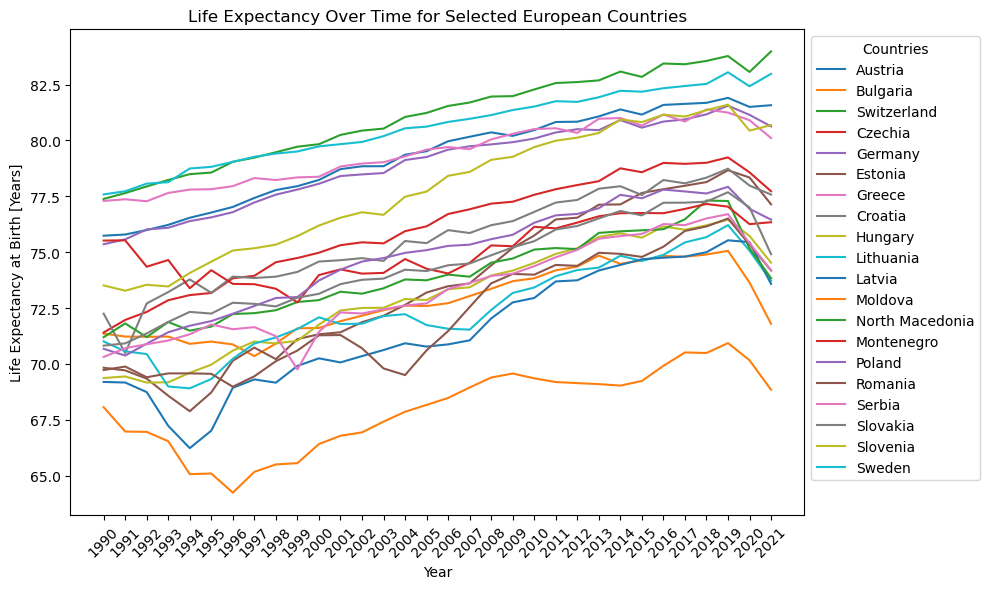

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


life_expectancy_cols = [col for col in df.columns if 'Life Expectancy at Birth' in col]


countries_of_interest = ["Hungary", "Slovakia", "Romania", "Poland", "Croatia", "Serbia", "Montenegro", "Abania", "Czechia", "Bulgaria", "Greece", "North Macedonia"
             , "Moldova", "Lithuania", "Latvia", "Germany", "Austria", "Switzerland", "Slovenia","Sweden","Estonia"] 
Meno_orszagok = [ "Switzerland","Sweden","Greece","Austria","Slovenia","Germany"]
selected_countries = df[df['Country'].isin(countries_of_interest)]


years = [int(col.split()[-1].strip('()')) for col in life_expectancy_cols]


plt.figure(figsize=(10, 6))


for index, row in selected_countries.iterrows():
    plt.plot(years, row[life_expectancy_cols], label=row['Country'])


plt.title('Life Expectancy Over Time for Selected European Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth [Years]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Countries")
plt.xticks(years, rotation=45)
plt.tight_layout()

plt.show()


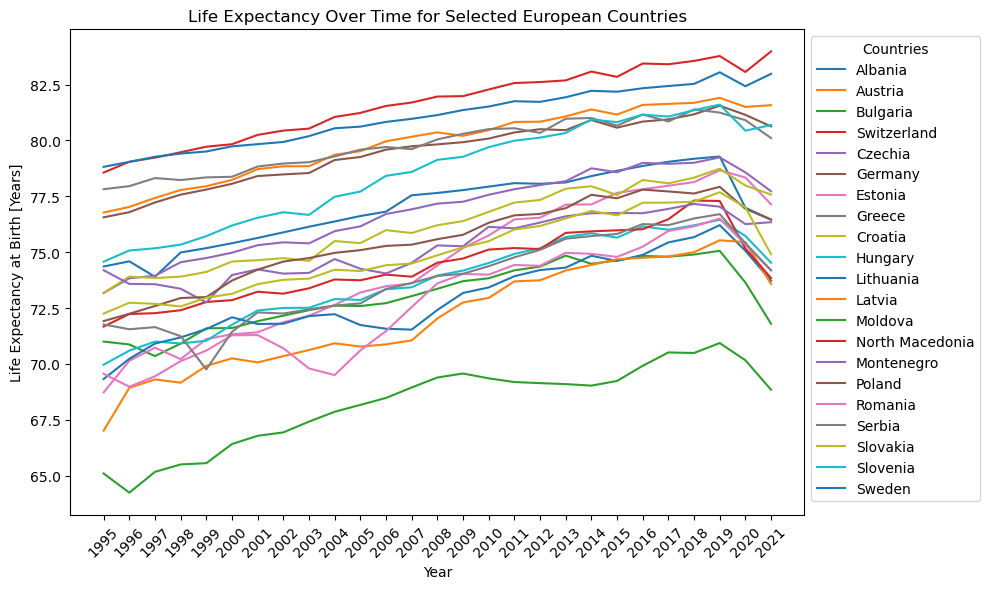

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the range of years you want to plot
start_year = 1995
end_year = 2021

# Select life expectancy columns for the year range
life_expectancy_cols = [col for col in df.columns if 'Life Expectancy at Birth' in col]

# Extract the corresponding years from the column names
years = [int(col.split()[-1].strip('()')) for col in life_expectancy_cols]

# Filter the years and columns to include only those within the specified range
filtered_years = [year for year in years if start_year <= year <= end_year]
filtered_cols = [col for col, year in zip(life_expectancy_cols, years) if start_year <= year <= end_year]

# Countries of interest
countries_of_interest = ["Hungary", "Slovakia", "Romania", "Poland", "Croatia", "Serbia", "Montenegro", "Albania", "Czechia", "Bulgaria", "Greece", "North Macedonia",
                         "Moldova", "Lithuania", "Latvia", "Germany", "Austria", "Switzerland", "Slovenia", "Sweden", "Estonia"] 
selected_countries = df[df['Country'].isin(countries_of_interest)]

# Plot
plt.figure(figsize=(10, 6))

for index, row in selected_countries.iterrows():
    plt.plot(filtered_years, row[filtered_cols], label=row['Country'])

plt.title('Life Expectancy Over Time for Selected European Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth [Years]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Countries")
plt.xticks(filtered_years, rotation=45)
plt.tight_layout()

plt.show()

In [5]:
# Step 1: Filter data for 2020 and include ISO3 codes
life_expectancy_2020_col = 'Life Expectancy at Birth (2020)'

# Include 'ISO3', 'Country', and 'Life Expectancy at Birth (2020)' columns
ranking_2020 = selected_countries[['Country', 'ISO3', life_expectancy_2020_col]].copy()

# Step 2: Sort the countries by life expectancy in 2020 in descending order
ranking_2020 = ranking_2020.sort_values(by=life_expectancy_2020_col, ascending=False)

# Step 3: Reset index for better readability
ranking_2020.reset_index(drop=True, inplace=True)


ranking_2020



,Country,ISO3,Life Expectancy at Birth (2020)
0,Switzerland,CHE,83.0670
1,Sweden,SWE,82.4274
2,Austria,AUT,81.5036
3,Germany,DEU,81.1472
4,Greece,GRC,80.9092
5,Slovenia,SVN,80.4409
6,Czechia,CZE,78.5746
7,Estonia,EST,78.3431
8,Croatia,HRV,77.9845
9,Slovakia,SVK,77.0054


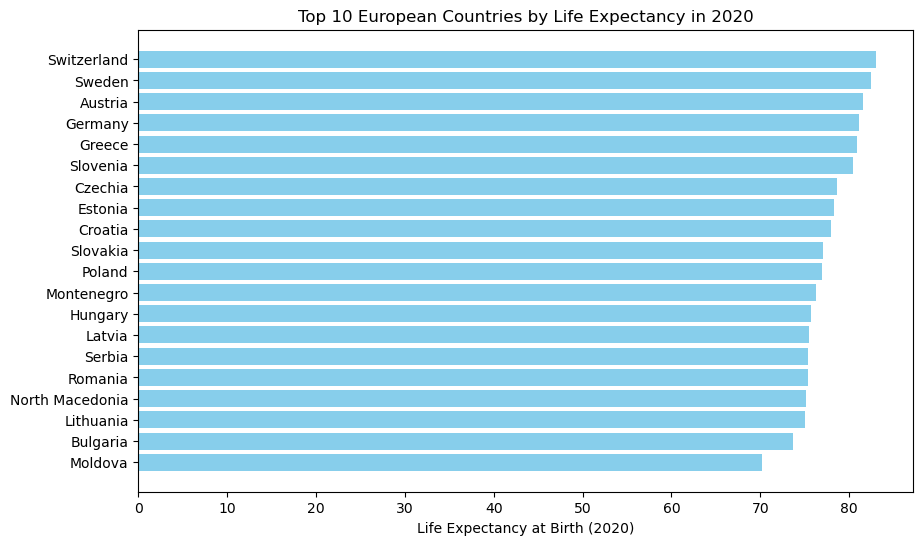

In [6]:
# Step 5: Visualize the top 10 ranked countries for 2020 life expectancy
plt.figure(figsize=(10, 6))
plt.barh(ranking_2020['Country'].head(30), ranking_2020[life_expectancy_2020_col].head(30), color='skyblue')
plt.xlabel('Life Expectancy at Birth (2020)')
plt.title('Top 10 European Countries by Life Expectancy in 2020')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest at the top
plt.show()
